In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_ebay_deals.csv")



In [4]:
# Display basic info and first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            92 non-null     object 
 1   title                92 non-null     object 
 2   price                92 non-null     float64
 3   original_price       92 non-null     float64
 4   shipping             92 non-null     object 
 5   item_url             92 non-null     object 
 6   discount_percentage  92 non-null     float64
dtypes: float64(3), object(4)
memory usage: 5.2+ KB


,timestamp,title,price,original_price,shipping,item_url,discount_percentage
0,2025-03-21 13:38:27,Microsoft Xbox Series S,299.00,299.00,Shipping info unavailable,https://www.ebay.com/itm/266190900217?_trkparm...,0.0
1,2025-03-21 13:38:27,Apple iPhone 15 Pro 256gb ( Unlocked) US E-Sim...,674.99,674.99,Shipping info unavailable,https://www.ebay.com/itm/166613095133?_trkparm...,0.0
2,2025-03-21 13:38:27,Google Pixel 8 Pro 128GB Factory Unlocked - Ex...,434.99,434.99,Shipping info unavailable,https://www.ebay.com/itm/226348022590?_trkparm...,0.0
3,2025-03-21 13:38:27,Apple Macbook Air MLY33LL/A 2022 M2 - Magsafe ...,650.00,650.00,Shipping info unavailable,https://www.ebay.com/itm/166206685749?_trkparm...,0.0
4,2025-03-21 13:38:27,Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unl...,159.95,159.95,Shipping info unavailable,https://www.ebay.com/itm/185698601733?_trkparm...,0.0


<ipython-input-5-9945d56b83c8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deals_per_hour.index, y=deals_per_hour.values, palette="viridis")


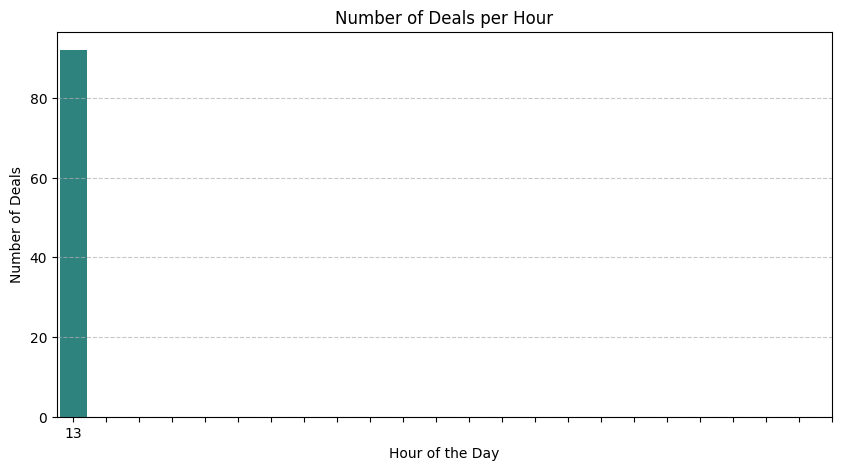

In [5]:
# Convert timestamp to datetime format and extract the hour
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour

# Group by hour and count the number of deals
deals_per_hour = df.groupby("hour").size()

# Plot the number of deals per hour
plt.figure(figsize=(10, 5))
sns.barplot(x=deals_per_hour.index, y=deals_per_hour.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Deals")
plt.title("Number of Deals per Hour")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


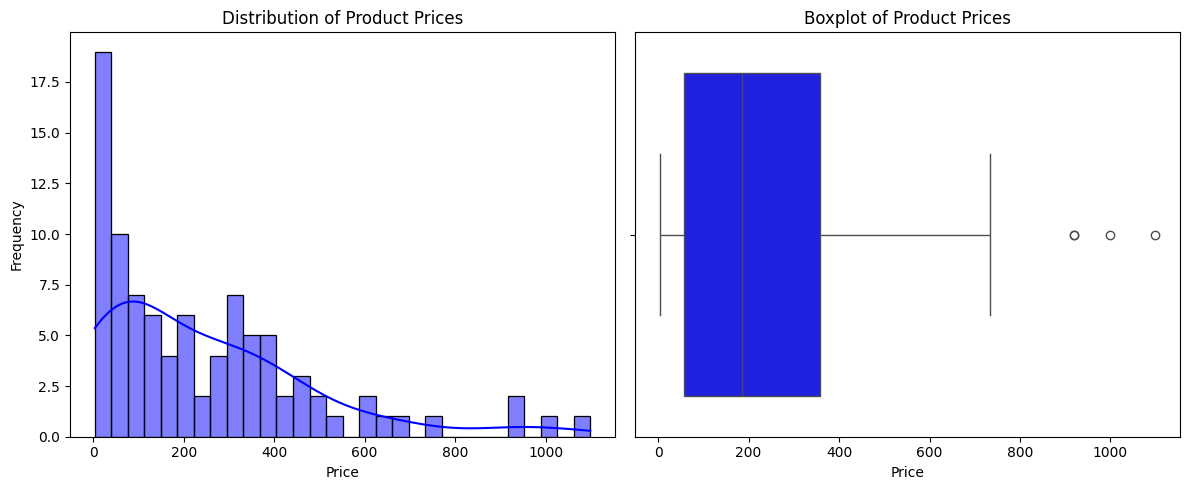

In [6]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["price"], bins=30, kde=True, color="blue")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Product Prices")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["price"], color="blue")
plt.xlabel("Price")
plt.title("Boxplot of Product Prices")

plt.tight_layout()
plt.show()


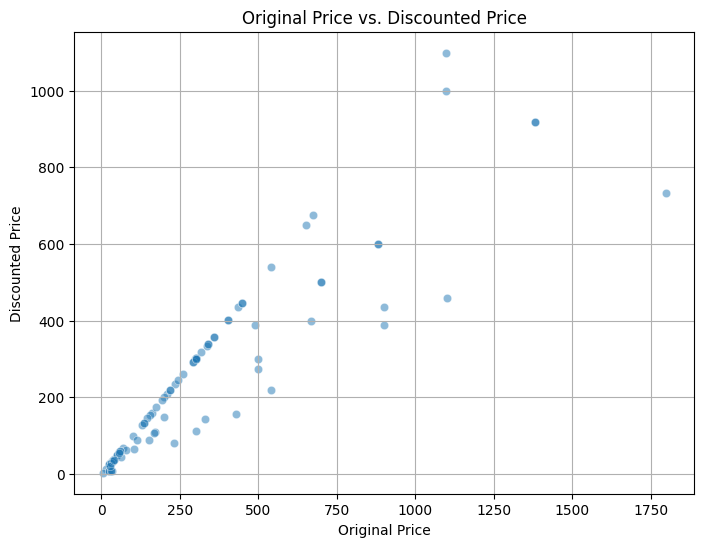

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["original_price"], y=df["price"], alpha=0.5)
plt.xlabel("Original Price")
plt.ylabel("Discounted Price")
plt.title("Original Price vs. Discounted Price")
plt.grid(True)
plt.show()


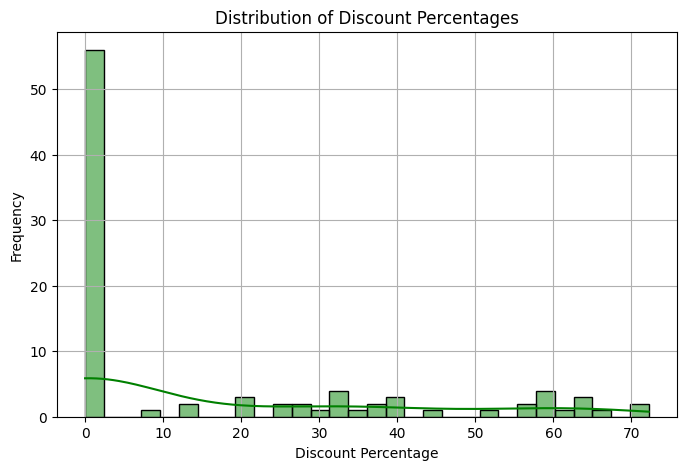

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["discount_percentage"], bins=30, kde=True, color="green")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Discount Percentages")
plt.grid(True)
plt.show()


<ipython-input-9-e67345b98493>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette="coolwarm")


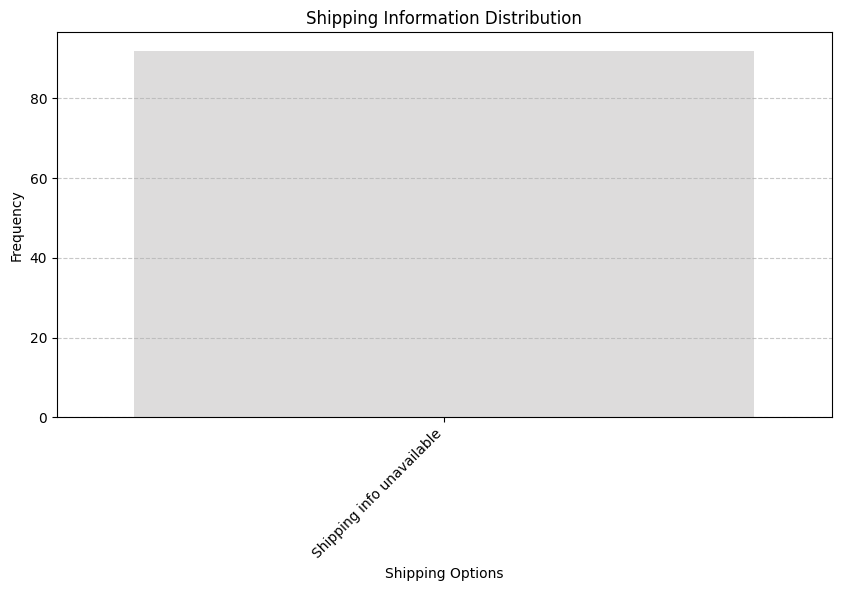

In [9]:
# Count the frequency of different shipping options
shipping_counts = df["shipping"].value_counts()

# Plot the frequency of shipping options
plt.figure(figsize=(10, 5))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Shipping Options")
plt.ylabel("Frequency")
plt.title("Shipping Information Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<ipython-input-10-206a8ef159d9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_df.index, y=keyword_df["Count"], palette="magma")


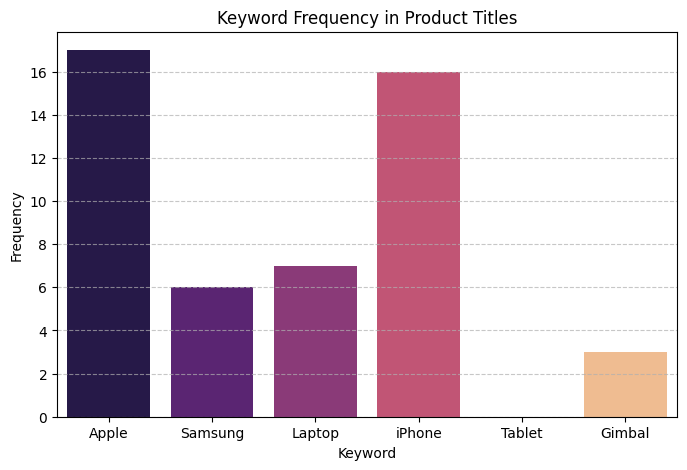

In [10]:
# Define a set of keywords to look for
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]

# Count occurrences of each keyword (case-insensitive)
keyword_counts = {word: df["title"].str.contains(word, case=False, na=False).sum() for word in keywords}

# Convert to DataFrame for visualization
keyword_df = pd.DataFrame.from_dict(keyword_counts, orient="index", columns=["Count"])

# Plot the keyword frequencies
plt.figure(figsize=(8, 5))
sns.barplot(x=keyword_df.index, y=keyword_df["Count"], palette="magma")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.title("Keyword Frequency in Product Titles")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


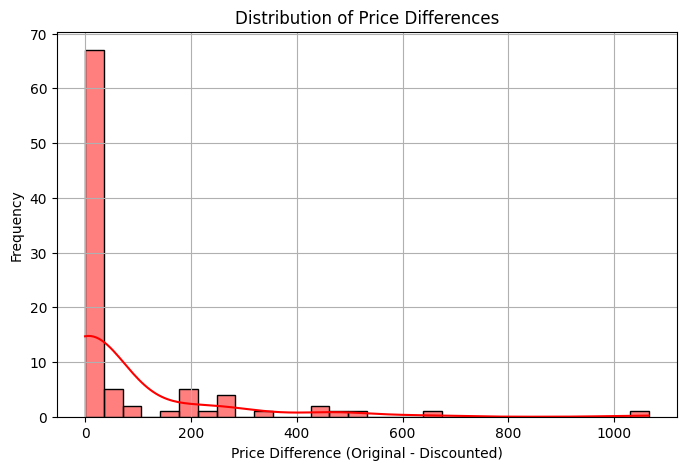

In [11]:
# Compute absolute discount (original_price - price)
df["absolute_discount"] = df["original_price"] - df["price"]

# Plot histogram of absolute discounts
plt.figure(figsize=(8, 5))
sns.histplot(df["absolute_discount"], bins=30, kde=True, color="red")
plt.xlabel("Price Difference (Original - Discounted)")
plt.ylabel("Frequency")
plt.title("Distribution of Price Differences")
plt.grid(True)
plt.show()


In [12]:
# Sort dataset by discount_percentage in descending order
top_discounts = df.sort_values(by="discount_percentage", ascending=False).head(5)

# Display the top 5 deals
top_discounts


,timestamp,title,price,original_price,shipping,item_url,discount_percentage,hour,absolute_discount
75,2025-03-21 13:38:29,Max/Max 2 - White House Hero DVD - BRAND-NEW a...,8.88,31.95,Shipping info unavailable,https://www.ebay.com/itm/176908244586?_trkparm...,72.21,13,23.07
76,2025-03-21 13:38:29,Double Feature DVD: The Losers & RocknRolla wi...,8.88,29.95,Shipping info unavailable,https://www.ebay.com/itm/405628328337?_trkparm...,70.35,13,21.07
60,2025-03-21 13:38:29,Soundcore Space Q45 Wireless Headphone Over-Ea...,79.99,229.99,Shipping info unavailable,https://www.ebay.com/itm/383512859307?_trkparm...,65.22,13,150.00
72,2025-03-21 13:38:29,Otto the Rhino DVD 2012 Animated English Versi...,8.88,24.95,Shipping info unavailable,https://www.ebay.com/itm/176906606227?_trkparm...,64.41,13,16.07
73,2025-03-21 13:38:29,"Poms (DVD, 2019, Widescreen) Diane Keaton, Jac...",8.88,24.95,Shipping info unavailable,https://www.ebay.com/itm/176908181307?_trkparm...,64.41,13,16.07
